# Overview Of Credit Loan Data

VARIABLE DESCRIPTIONS:

Loan_ID:                  Unique Loan ID

Gender:	                  Male/ Female

Married:	              Applicant married (Y/N)

Dependents:	              Number of dependents

Education:	              Applicant Education (Graduate/ Under Graduate)

Self_Employed:	          Self employed (Y/N)

ApplicantIncome:          Applicant income

CoapplicantIncome:	      Coapplicant income

LoanAmount:	              Loan amount in thousands

Loan_Amount_Term:	      Term of loan in months

Credit_History:	          Credit history meets guidelines

Property_Area:	          Urban/ Semi Urban/ Rural

Loan_Status:	          Loan approved (Y/N)

In [1]:
#import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load datasets
df_train=pd.read_csv('train_loan.csv')
df_test=pd.read_csv('test_loan.csv')

# Quick Data Exploration

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
#Quantitative Variables
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#Categorical Variables
df_train.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001732,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# Distribution Analysis

Numerical variables: 

1.ApplicantIncome

2.CoapplicantIncome

3.LoanAmount

4.Loan_Amount_Term

5.Credit_History

Histrograms of ApplicantIncome, CoapplicantIncome and LoanAmount

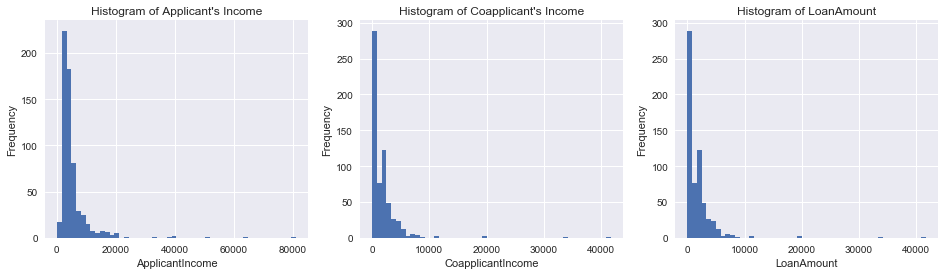

In [8]:
#ApplicantIncome
fig=plt.figure(figsize=(16,4))
ax1=fig.add_subplot(131)
ax1.set_xlabel('ApplicantIncome')
ax1.set_title('Histogram of Applicant\'s Income')
df_train.ApplicantIncome.plot(kind='hist', bins=50)
#CoapplicantIncome
ax2=fig.add_subplot(132)
ax2.set_xlabel('CoapplicantIncome')
ax2.set_title('Histogram of Coapplicant\'s Income')
df_train.CoapplicantIncome.plot(kind='hist', bins=50)
#LoanAmount 
ax3=fig.add_subplot(133)
ax3.set_xlabel('LoanAmount')
ax3.set_title('Histogram of LoanAmount')
df_train.CoapplicantIncome.plot(kind='hist', bins=50)

# Categorical Variable Analysis

Credit_History with Loan_Status

In [9]:
temp1=df_train.Credit_History.value_counts(ascending=True)
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [10]:
temp2=df_train.pivot_table(values='Loan_Status', index='Credit_History', aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
temp2

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

In [11]:
temp3=df_train.pivot_table(values='Credit_History', index='Loan_Status', aggfunc=np.mean)
temp3

Loan_Status
N    0.541899
Y    0.981818
Name: Credit_History, dtype: float64

In [12]:
temp4=pd.crosstab(df_train.Credit_History, df_train.Loan_Status)
temp4

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


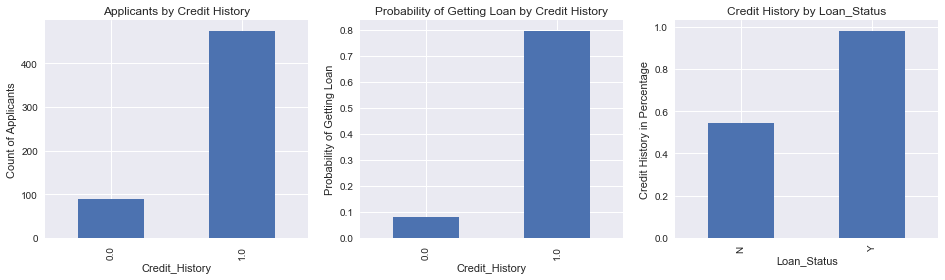

In [13]:
fig2=plt.figure(figsize=(16,4))
axx1=fig2.add_subplot(131)
axx1.set_title('Applicants by Credit History')
axx1.set_xlabel('Credit_History')
axx1.set_ylabel('Count of Applicants')
temp1.plot(kind='bar')

axx2=fig2.add_subplot(132)
axx2.set_title('Probability of Getting Loan by Credit History')
axx2.set_xlabel('Credit_History')
axx2.set_ylabel('Probability of Getting Loan')
temp2.plot(kind='bar')

axx3=fig2.add_subplot(133)
axx3.set_ylabel('Credit History in Percentage')
axx3.set_title('Credit History by Loan_Status')
temp3.plot(kind='bar')

From this we can tell that ppl with Credit_History are more inclined to have their loan approved or in other words most ppl whose loans are approved have credit history

# Imputing Missing Values

In [14]:
#Summary of missing values
df_train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

1.Self_Employed: impute the missing value with the majority of Self_Employed

In [15]:
df_train.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [16]:
df_train.Self_Employed.fillna('No', inplace=True)

In [17]:
#double check the missing value list
df_train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

2.Loan_Amount_Term

In [18]:
df_train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [19]:
df_train.Loan_Amount_Term.fillna('360', inplace=True)

In [20]:
df_train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

3.LoanAmount: 
a. use the mean of the rest to impute the missing LoanAmount values
b. use the hypothesis that whether a person is educated or self-employed combined can give a good estimate of the loan amount

In [21]:
# Solution a
df_train.LoanAmount.fillna(df_train.LoanAmount.mean(), inplace=True)
#double check the missing values list after filling the missing value
df_train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

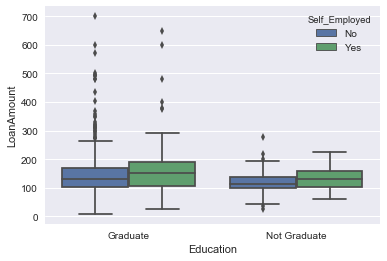

In [22]:
# Solution b: combine Loan_Amount with Education and Self_Employed
sns.boxplot(x='Education',y='LoanAmount',hue='Self_Employed', orient='v', data=df_train)

In [23]:
table=df_train.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,131.0,115.0
Yes,152.0,130.0


In [24]:
def fage(x):
    return table.loc[x['Self_Employed'], x['Education']]

In [25]:
df_train[df_train['LoanAmount'].isnull()].apply(fage, axis=1)
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360,1.0,Urban,Y


In [26]:
df_train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

4.Credit_History: according to the categorical variable analysis, most ppl who have Loan_Status = Y, have Credit_History. Therefore I impute missing Credit_History according to the Loan_Status

In [27]:
df_train.loc[(df_train.Credit_History.isnull()) & (df_train.Loan_Status =='Y'),['Credit_History']]=1

In [28]:
df_train.loc[(df_train.Credit_History.isnull()) & (df_train.Loan_Status =='N'),['Credit_History']]=0

In [29]:
df_train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

5.Gender, Married, Dependents: as the missing values account for a small part of the total population, 
I dropped the missving values

In [30]:
df_train.dropna(axis=0, how='any', inplace=True)

In [31]:
df_train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Feature Engineering

1.LoanAmount_log: lognormal transformation

In [32]:
df_train['LoanAmount_log']=np.log(df_train.LoanAmount)

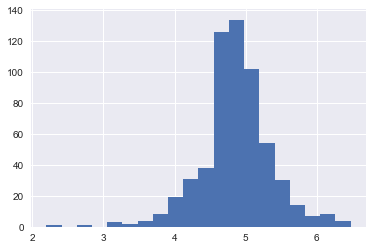

In [33]:
df_train['LoanAmount_log'].hist(bins=20)

2.ApplicantIncome: combine ApplicantIncome and CoapplicantIncome and make lognormal transformation

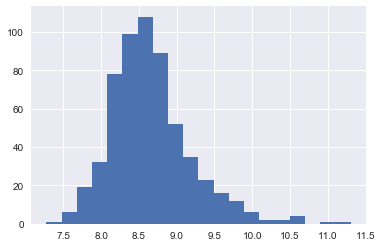

In [34]:
df_train['TotalIncome']=df_train.ApplicantIncome+df_train.CoapplicantIncome
df_train['TotalIncome_log']=np.log(df_train.TotalIncome)
df_train.TotalIncome_log.hist(bins=20)

In [35]:
var_mod=['Gender', 'Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in var_mod:
    print (set(df_train[i]))

{'Male', 'Female'}
{'Yes', 'No'}
{'2', '3+', '0', '1'}
{'Not Graduate', 'Graduate'}
{'Yes', 'No'}
{'Rural', 'Urban', 'Semiurban'}
{'Y', 'N'}


In [36]:
df_train.loc[df_train.Dependents=='3+', 'Dependents']='3'

In [38]:
df_train=df_train.drop(['Loan_ID'], axis=1)

3.Encode categorical variables into dummy variables

In [47]:
from sklearn.preprocessing import LabelEncoder
var_mod1=['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area', 'Loan_Status']
labelencoder=LabelEncoder()
#onehotencoder_X=OneHotEncoder(categorical_features=[3,11])
for i in var_mod1:
    df_train[i]=labelencoder.fit_transform(df_train[i])

# Model Evaluation

In [58]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from itertools import product 

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
  #plot confusion matrix:
 
  cm=metrics.confusion_matrix(data[outcome], predictions)
  print (cm)
 
  title='Confusion matrix'
  normalize=False
  cmap=plt.cm.Purples
  classes=['Yes', 'No']
  plt.figure(figsize=(6, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  thresh=cm.max()/2
  for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

Accuracy : 82.765%
Cross-Validation Score : 82.763%
[[ 87  94]
 [  7 398]]


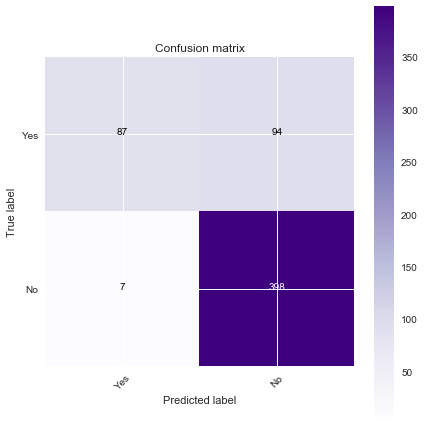

In [59]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df_train ,predictor_var,outcome_var)

Accuracy : 82.765%
Cross-Validation Score : 82.763%
[[ 87  94]
 [  7 398]]


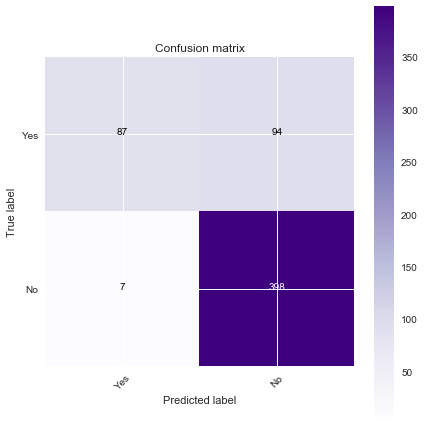

In [60]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df_train ,predictor_var,outcome_var)

Accuracy : 90.273%
Cross-Validation Score : 69.623%
[[142  39]
 [ 18 387]]


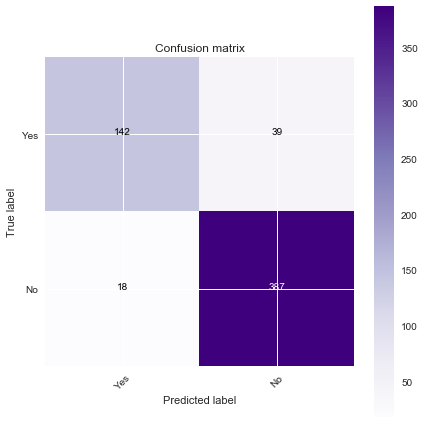

In [61]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df_train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 80.035%
[[181   0]
 [  0 405]]


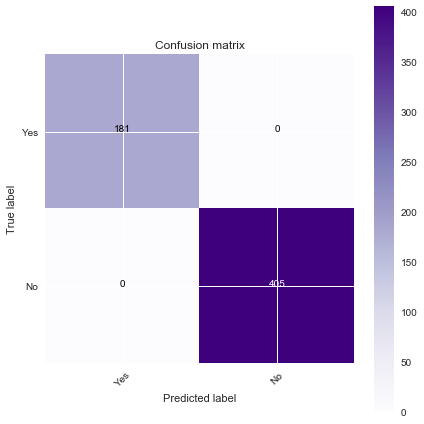

In [62]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df_train,predictor_var,outcome_var)

Accuracy : 82.935%
Cross-Validation Score : 74.236%
[[ 95  86]
 [ 14 391]]


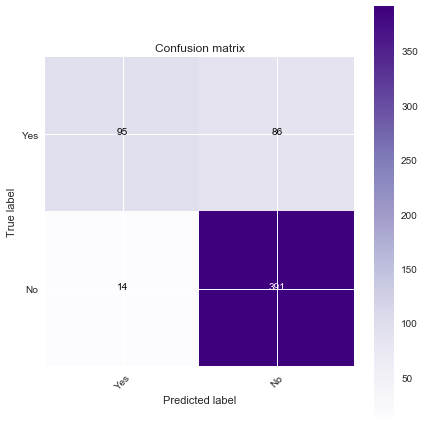

In [63]:
model=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df_train,predictor_var,outcome_var)